# Building the pipeline for working with EEG data

In this notebook
- we build the codes to extract initial raw data;
- we calculate different metrics as mesuares of functional connectivity;
- based on calculated measures like Mutual Information and Coherence we create Adjacency Matrices; 
- we create graphs based on the previously calculated metrics;
- make some plots to visualize the obtained graphs.

MAYBE based on graphs we will train some graph convolutional neural networks...

# 0 - Required packages



# 1 - Datasets Links

 Links for downloading the datasets: https://isip.piconepress.com/projects/tuh_eeg/html/downloads.shtml
 
 Command for getting the data from the server: 
- rsync -auxvL nedc@www.isip.piconepress.com:data/eeg/tuh_eeg_abnormal/v2.0.0/ . 
- rsync -auxvL nedc@www.isip.piconepress.com:data/eeg/tuh_eeg_epilepsy/v1.0.0/ .

TUH EEG Epilepsy Corpus. It was created to provide data for the purposes of automatic analysis of EEG. The patients were sorted by using a filter that categorized patients into two classes: epilepsy and not epilepsy. This was based on information in the session reports relating to their clinical history, medications at the time of recording, and EEG features associated with epilepsy. 
This subset contains European data format (EDF) files and corresponding neurologist reports for 1,648 files in  561 sessions from 200 patients. From these, 1473 files in 436 sessions from 100 patients have epilepsy, whereas 326 files in 134 sessions from 100 patients do not have epilepsy.
link: https://isip.piconepress.com/conferences/ieee_spmb/2017/papers/p01_13.pdf

FILENAME STRUCTURE "TUH EEG Epilepsy Corpus.":

 A typical filename in this corpus is: edf/epilepsy/01_tcp_ar/003/00000355/s003_2013_01_04/00000355_s003_t000.edf

 The first segment, "edf/", is a directory name for the directory containing the data, which consists of edf files (*.edf) and EEG reports (*.txt).

 The second segment denotes either patients with epilepsy ("/epilepsy") or patients with without epilepsy ("/no_epilepsy").

 The third segment ("/01_tcp_ar") denotes the type of channel configurationfor the EEG. "/01_tcp_ar" refers to an AR reference configuration.

 The fourth segment ("003") is a three-digit identifier meant to keep the number of subdirectories in a directory manageable. This follows the TUH EEG v1.1.0 convention.

 The fifth segment ("/00000355") denotes an anonymized patient ID. The IDs are consistent across all of our databases involving Temple
 Hospital EEG data.

 The sixth segment ("/s003_2013_01_04") denotes the session number("s003"), and the date the EEG was archived at the hospital("01/04/2013").

 The seventh, or last, segment is the filename ("00000355_s003_t000.edf"). This includes the patient number, the session number and a token number ("t000").

 Sessions were sorted into epilepsy and no epilepsy categories by searching the associated EEG reports for indications as to a epilepsy/no epilepsy 
 diagnosis based on clinical history, medications at the time of recording, and EEG features associated with epilepsy such as spike and sharp waves. 


### Data engineering

In [1]:
from glob2 import glob
import numpy as np
import mne
import matplotlib.pyplot as plt
from mne.datasets import eegbci
from mne.io import concatenate_raws, read_raw_edf

In [2]:
#edf_file_list = glob("../tuh_eeg_abnormal/edf/*/*/*/*/*/*/*.edf")
edf_file_list = glob("../tuh_eeg_epilepsy/edf/*/*/*/*/*/*.edf")

len(edf_file_list)

1648

In [3]:
file_path = edf_file_list[0]
raw_data = mne.io.read_raw_edf(file_path, verbose=False, preload=False)

In [4]:
edf_file_list[0].split("/")

['..',
 'tuh_eeg_epilepsy',
 'edf',
 'epilepsy',
 '03_tcp_ar_a',
 '076',
 '00007656',
 's010_2011_03_13',
 '00007656_s010_t000.edf']

In [5]:
# extract subject IDs from the file path, create python set to extract unique elements from list, convert to list again 
unique_epilepsy_patient_ids = list(set([x.split("/")[-1].split("_")[0] for x in edf_file_list]))
len(unique_epilepsy_patient_ids)

200

In [6]:
unique_epilepsy_patient_ids[0]

'00007813'

In [12]:
#plt.plot()
raw = read_raw_edf(edf_file_list[1], preload=True)

Extracting EDF parameters from /Users/jonkil/Documents/Experiments_EEG/tuh_eeg_epilepsy/edf/epilepsy/03_tcp_ar_a/076/00007656/s010_2011_03_13/00007656_s010_t001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76799  =      0.000 ...   299.996 secs...


In [13]:
raw_data = raw._data
print("Number of channels: ", str(len(raw_data)))

Number of channels:  34


In [14]:
print("Number of samples: ", str(len(raw_data[0])))

Number of samples:  76800


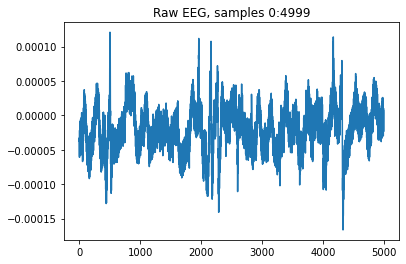

In [15]:
plt.plot(raw_data[0,:4999])
plt.title("Raw EEG, samples 0:4999")
plt.show()